# Regularized Regression : LASSO

*Least Absolute Shrinkage and Selection Operator Regression* (simply called *Lasso Regression*) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the *l1* norm of the weight vector instead of half the square of the *l2* norm.

This is the Lasso regression cost function:

$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} | \theta_i |$

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

from sklearn.metrics import mean_squared_error

Loading the data and creating the dataframe:

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
list(cancer_df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
y = pd.DataFrame(cancer.target, columns=["cancer"])
y.head()

,cancer
0,0
1,0
2,0
3,0
4,0


In [7]:
y.groupby("cancer").size()

cancer
0    212
1    357
dtype: int64

[Text(0, 0, 'Malignant'), Text(0, 0, 'Benign')]

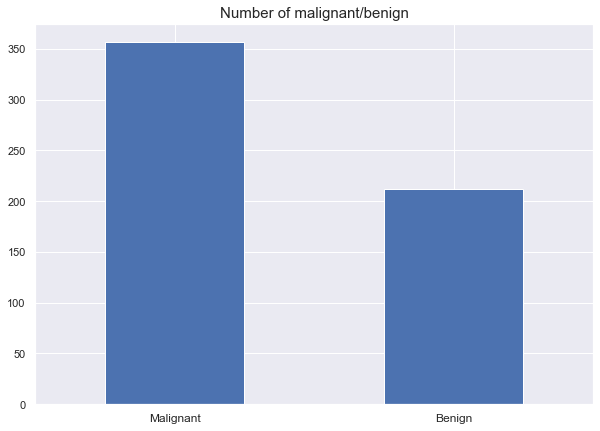

In [8]:
ax = y.cancer.value_counts().plot(kind='bar',
                                  title='Number of malignant/benign')
ax.title.set_fontsize(15)
ax.set_xticklabels(['Malignant', 'Benign'], fontsize=12, rotation='horizontal')

We want to look at correlation between variables

In [9]:
featureMeans = list(cancer_df.columns[1:10])

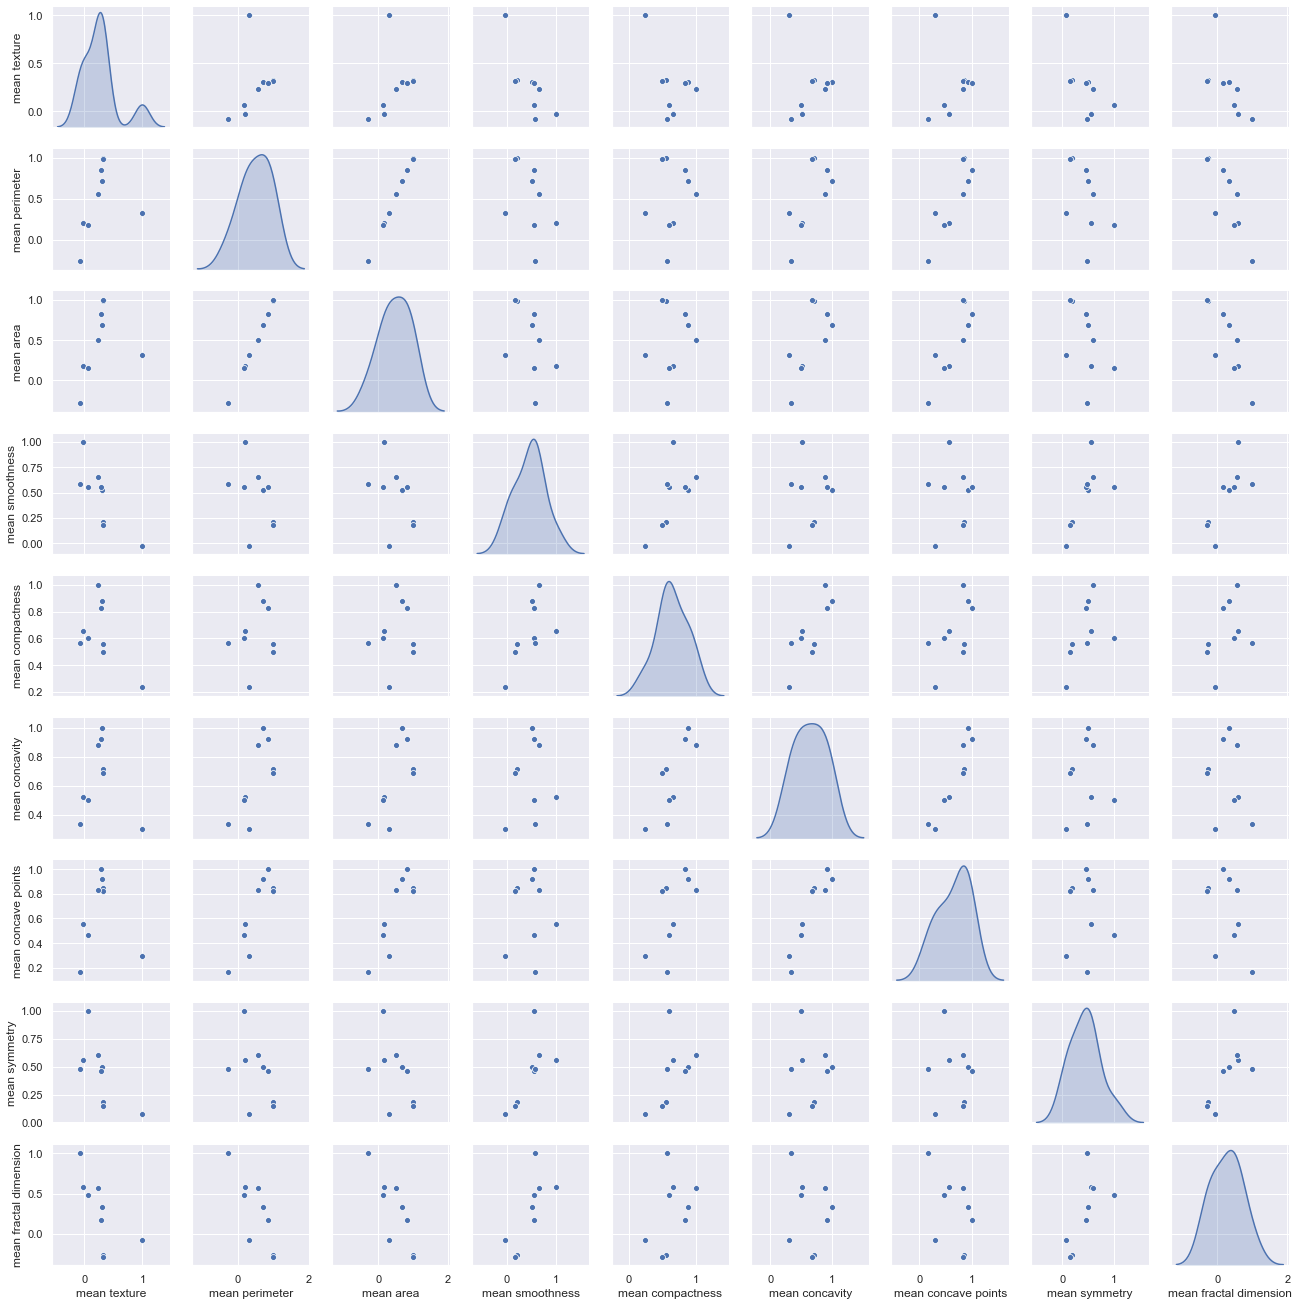

In [10]:
correlationData = cancer_df[featureMeans].corr()
sns.pairplot(cancer_df[featureMeans].corr(), diag_kind='kde', height=2);

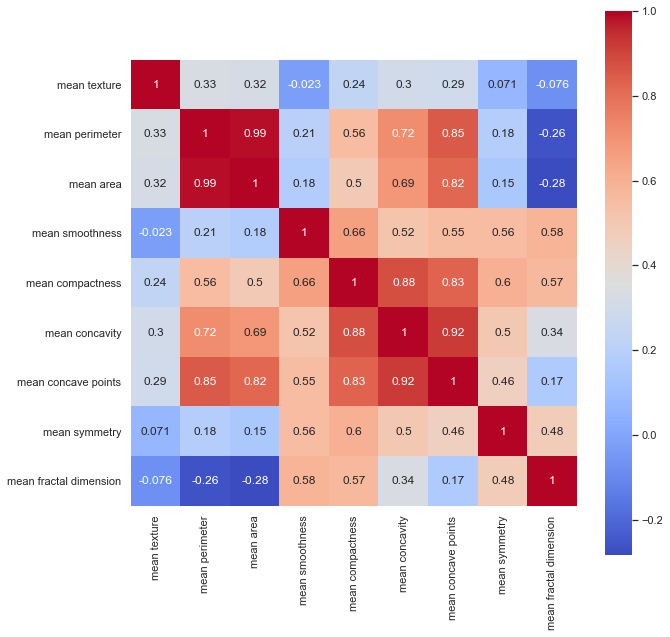

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(cancer_df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [12]:
cancer_df_with_diagnosis = cancer_df.copy()
cancer_df_with_diagnosis["diagnosis"] = y.cancer

In [13]:
cancer_df_with_diagnosis.diagnosis[cancer_df_with_diagnosis["diagnosis"] == 0] = "Malignant"
cancer_df_with_diagnosis.diagnosis[cancer_df_with_diagnosis["diagnosis"] == 1] = "Benign"

/Users/Carlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
cancer_df_with_diagnosis.diagnosis

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: diagnosis, Length: 569, dtype: object

Distribution of different variables based on the cell's nature (malignant or benign):

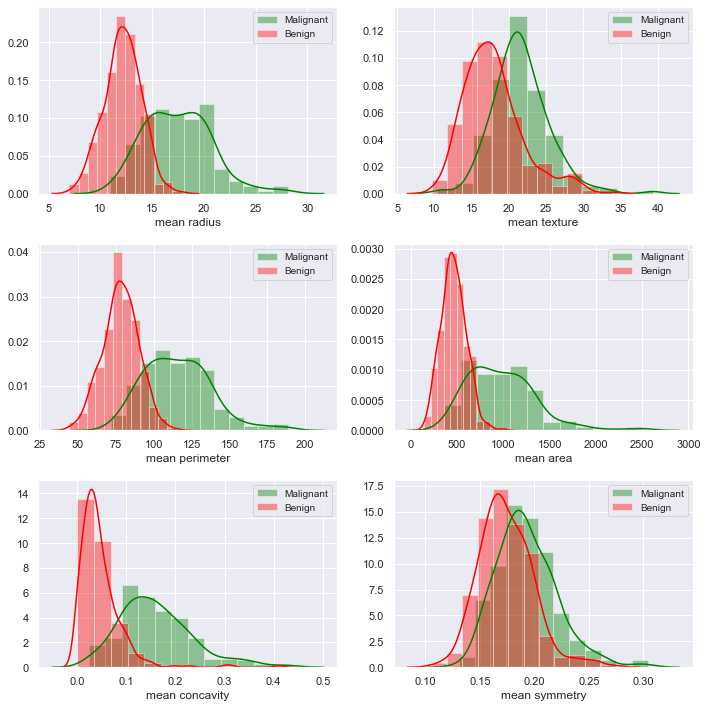

In [15]:
bins = 12
plt.figure(figsize=(10,10))

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean symmetry']

malignant = cancer_df_with_diagnosis[cancer_df_with_diagnosis.diagnosis == "Malignant"]
benign = cancer_df_with_diagnosis[cancer_df_with_diagnosis.diagnosis == "Benign"]

for i in np.arange(0,len(features)):
    plt.subplot(3, 2, i+1)
    sns.distplot(malignant[features[i]], bins=bins, color='green', label='Malignant')
    sns.distplot(benign[features[i]], bins=bins, color='red', label='Benign')
    plt.legend(fontsize=10)
    
plt.tight_layout()
plt.show()

Preparing the data for training and usind the standard scaler.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_df, y, test_size = 0.3, random_state=31)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_fit = sc.fit(X_train)
#X_train = sc_fit.transform(X_train)
#X_test = sc_fit.transform(X_test)

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, we need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

We generate the models that we are interested in.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
log = LogisticRegression(penalty='none')
lin = LinearRegression()
lasso1 = Lasso(alpha = 1)
lasso2 = Lasso(alpha = 0.01)
lasso3 = Lasso(alpha = 0.0001)

We train them.

In [18]:
log.fit(X_train, y_train)
lin.fit(X_train, y_train)
lasso1.fit(X_train, y_train)
lasso2.fit(X_train, y_train)
lasso3.fit(X_train, y_train)

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

We check the scores for each model to check their performance.

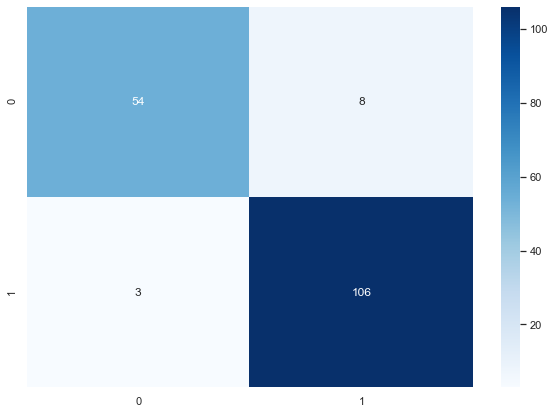

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [20]:
print("R2 Score on train data")
print("-------------------")
print("Log : {} \nLin : {} \nLasso1 : {} \nLasso2 : {} \nLasso3 : {}".format(log.score(X_train, y_train),
                                                                                                           lin.score(X_train, y_train),
                                                                                            lasso1.score(X_train, y_train),
                                                                                            lasso2.score(X_train, y_train),
                                                                                            lasso3.score(X_train,y_train),))

R2 Score on train data
-------------------
Log : 0.9547738693467337 
Lin : 0.7842206194055069 
Lasso1 : 0.5600974529893079 
Lasso2 : 0.7037865778498829 
Lasso3 : 0.7754872047516964


In [21]:
print("R2 Score on test data")
print("-------------------")
print("Log : {} \nLin : {} \nLasso1 : {} \nLasso2 : {} \nLasso3 : {}".format(
    log.score(X_train, y_train),
    lin.score(X_test, y_test),
    lasso1.score(X_test, y_test),
    lasso2.score(X_test, y_test),
    lasso3.score(X_test,y_test))
     )

R2 Score on test data
-------------------
Log : 0.9547738693467337 
Lin : 0.7329325010888681 
Lasso1 : 0.5832244618818156 
Lasso2 : 0.6641831577726228 
Lasso3 : 0.7313823250204423


In [22]:
not_null_log = np.sum(log.coef_!=0)
not_null_lin = np.sum(lin.coef_!=0)
not_null_lasso1 = np.sum(lasso1.coef_!=0)
not_null_lasso2 = np.sum(lasso2.coef_!=0)
not_null_lasso3 = np.sum(lasso3.coef_!=0)

print("Number of features used for every model")
print("-------------------")
print("N. features Log : {} \nN. features Lin : {} \nN. features Lasso1 : {} \nN. features Lasso2 : {} \nN. features Lasso3 : {}".format(not_null_log,
                                                                                                                                         not_null_lin,
                                                                                         not_null_lasso1,
                                                                                         not_null_lasso2,
                                                                                         not_null_lasso3))

Number of features used for every model
-------------------
N. features Log : 30 
N. features Lin : 30 
N. features Lasso1 : 4 
N. features Lasso2 : 10 
N. features Lasso3 : 22


Comparing the coeffients of the different models to see how the parameter alpha affects the number of null coefficients.

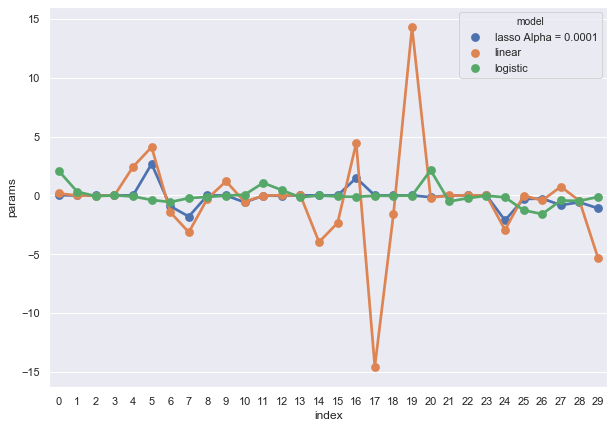

In [23]:
perf_lasso1 = pd.DataFrame({"params": lasso1.coef_, 
                                       "model": "lasso Alpha = 1", 
                                       "index": range(0, len(cancer_df.columns))})

perf_lasso2 = pd.DataFrame({"params": lasso2.coef_, 
                                       "model": "lasso Alpha = 0.01", 
                                       "index": range(0, len(cancer_df.columns))})

perf_lasso3 = pd.DataFrame({"params": lasso3.coef_, 
                                       "model": "lasso Alpha = 0.0001", 
                                       "index": range(0, len(cancer_df.columns))})


perf_lin = pd.DataFrame({"params": lin.coef_[0], 
                                       "model": "linear", 
                                       "index": range(0, len(cancer_df.columns))})
perf_log = pd.DataFrame({"params": log.coef_[0], 
                                       "model": "logistic", 
                                       "index": range(0, len(cancer_df.columns))})

perf_compar = pd.concat([perf_lasso3,perf_lin,perf_log])

import seaborn as sns
sns.pointplot(x = 'index',y = 'params',hue = 'model', style = 'model', data = perf_compar)

In [24]:
perf_compar

,params,model,index
0,0.018277,lasso Alpha = 0.0001,0
1,-0.003698,lasso Alpha = 0.0001,1
2,-0.001865,lasso Alpha = 0.0001,2
3,-0.000212,lasso Alpha = 0.0001,3
4,0.000000,lasso Alpha = 0.0001,4
...,...,...,...
25,-1.260779,logistic,25
26,-1.584657,logistic,26
27,-0.431941,logistic,27
28,-0.462928,logistic,28


In [25]:
[10**(-a) for a in range(10)]

[1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]

In [26]:
np.logspace(-5, 1, 10)

array([1.00000000e-05, 4.64158883e-05, 2.15443469e-04, 1.00000000e-03,
       4.64158883e-03, 2.15443469e-02, 1.00000000e-01, 4.64158883e-01,
       2.15443469e+00, 1.00000000e+01])

In [27]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [10**(-a) for a in range(10)]}
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid=params, cv = 10)

grid.fit(X_train,y_train)

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04117498733271319, tolerance: 0.008525139664804468
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.058789190088631926, tolerance: 0.0084804469273743
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013440753851330811, tolerance: 0.008306424581005587
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want 

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.9971619294706, tolerance: 0.008409217877094971
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.346745642539833, tolerance: 0.008332960893854748
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.098554692781791, tolerance: 0.008384357541899439
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to incre

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.81346190149966, tolerance: 0.008409217877094971
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.182460814371977, tolerance: 0.008332960893854748
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.94314506677818, tolerance: 0.008384357541899439
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to incre

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
grid.best_params_

{'alpha': 1e-05}

In [29]:
np.sum(grid.best_estimator_.coef_!=0)

28

In [30]:
#grid.cv_results_

In [31]:
#y_predict_lin = [elem[0] for elem in lin.predict(X_test)]

In [32]:
# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
lin_error = mean_squared_error(lin.predict(X_test), y_test.cancer)
log_error = mean_squared_error(log.predict(X_test), y_test.cancer)

lin_error, log_error

(0.06172299708086007, 0.06432748538011696)

In [33]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = Lasso()

coefs = []
errors_lasso = []
errors_log = []
errors_lin = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors_lin.append(lin_error)
    errors_log.append(log_error)
    errors_lasso.append(mean_squared_error(lasso.predict(X_test), y_test.cancer))

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.28521054859237, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.291597309107987, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.298209048170744, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to i

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.675005632182117, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.690025843475595, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.70539640673918, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to i

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.353817411599616, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.374280287163913, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.397726979388764, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to 

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.246738257433911, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.217746698448881, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.184687640188447, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to 

/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01574522510559717, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034072893322214526, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05925765211619094, tolerance: 0.009346733668341711
  positive)
/Users/Carlo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want

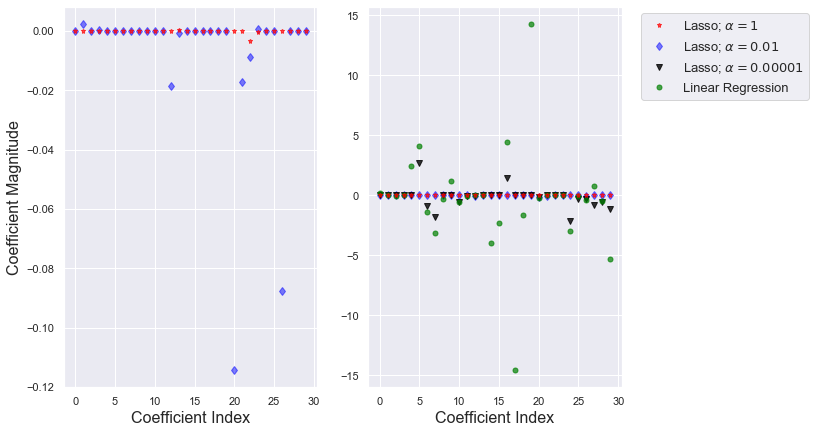

In [34]:
plt.subplot(1,2,1)
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

plt.subplot(1,2,2)
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso3.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lin.coef_[0],alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
#plt.plot(log.coef_[0],alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Logistic Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.legend(fontsize=13, bbox_to_anchor=(1.05, 1.0))

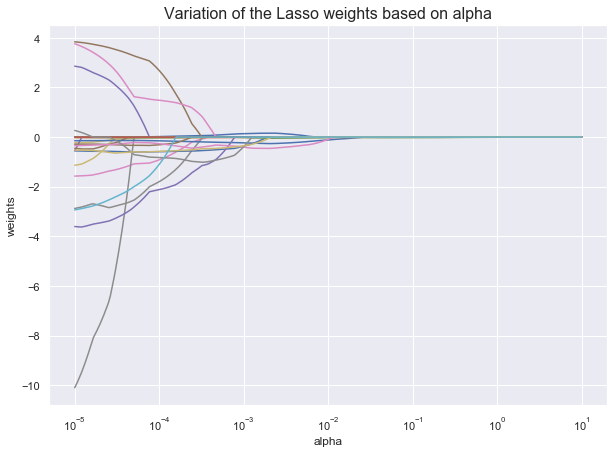

In [35]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.title('Variation of the Lasso weights based on alpha', fontsize=16)
plt.show()

Comparing the RMSE for different models and different values of alpha.

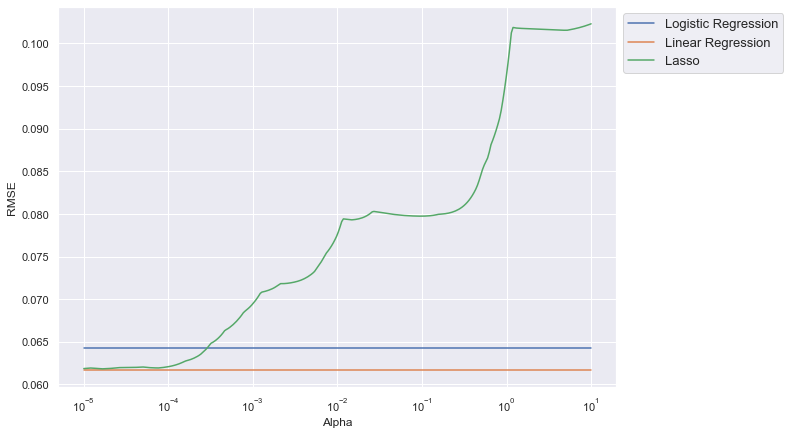

In [36]:
ax = plt.gca()

ax.plot(alphas, errors_log, label="Logistic Regression")
ax.plot(alphas, errors_lin, label="Linear Regression")
ax.plot(alphas, errors_lasso, label="Lasso")
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0))
plt.show()